# Import Libraries

In [87]:
#Import the libraries and dataset

# For Data Wrangling
import numpy as np
import pandas as pd

# for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn
sns.set_style("darkgrid")


# Load Dataset

In [85]:
df = pd.read_csv('laptop_data.csv')

In [88]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Understanding Dataset

In [89]:
print(f'The DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

The DataSet Contains 1303 rows & 12 columns.


In [90]:
# The dataset contains the following columns
df.columns.tolist()

['Unnamed: 0',
 'Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

# Checking for Duplicate

In [91]:
# check for duplicates
df.duplicated().sum()

0

* There are no duplicate in the data

## Data Information about all columns 

In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None



* here, we can see that the Columns - Ram, Memory & Weight have data type of Object we will need to convert to numeric data type during the data cleaning process

# Descriptive Statistics on data

In [94]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


# Correllation between Data

In [95]:
df.corr()

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


# Heatmap of dataset

<AxesSubplot:>

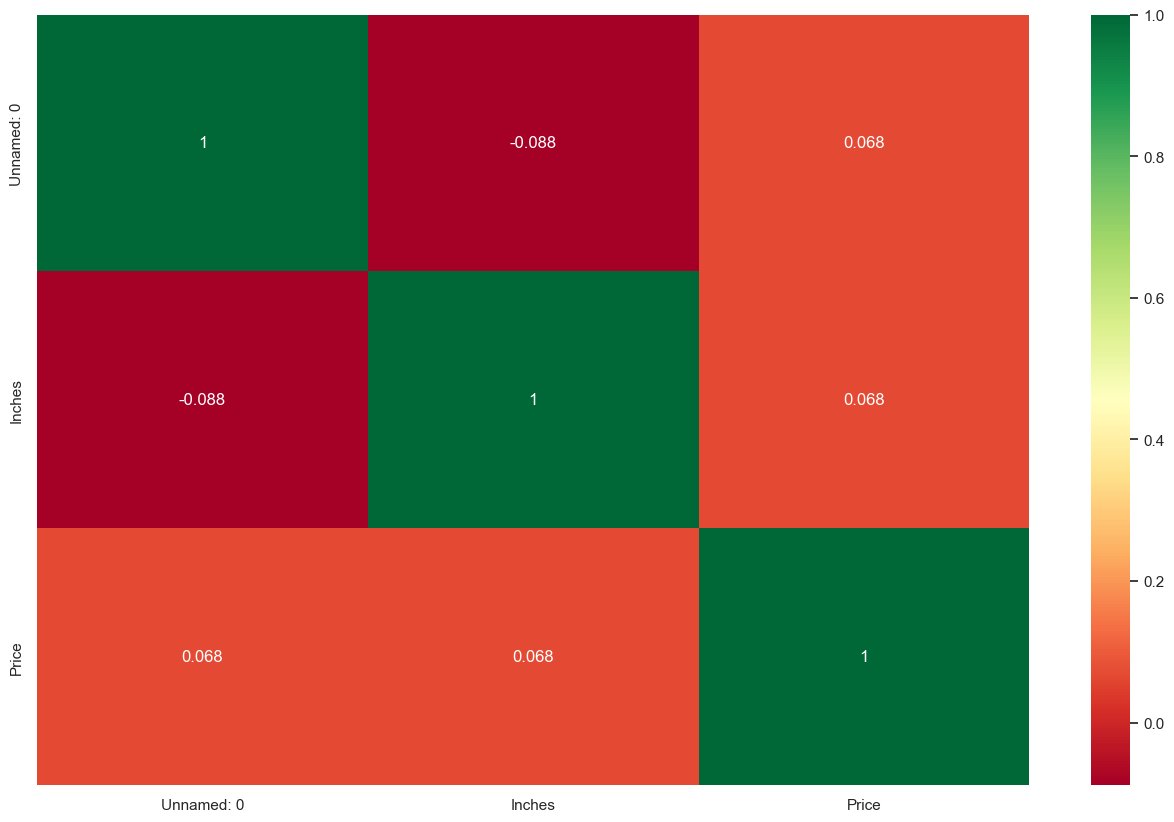

In [96]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [97]:
# Checking if there any null values in our dataset
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

* We can see that there is no missing data in the dataset

# Data Cleaning

In [98]:
#Drop unrequired column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [99]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
653,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.2kg,63499.104
139,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg,37242.720
865,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.07kg,48484.800
253,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37kg,98514.720
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.920


## Replace the GB and Kg

In [100]:
#Ram
df['Ram'] = df['Ram'].str.replace('GB','')

#Weight
df['Weight'] = df['Weight'].str.replace('kg','')

In [101]:
# convert both type to float
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [102]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1222,HP,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 2.7GHz,6,1TB HDD,AMD Radeon 530,Windows 10,2.10,28185.120
731,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.25,34578.720
10,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.86,20986.992
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.672
577,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.640


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB
None


# Feature Analysis

## Price Distriution

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


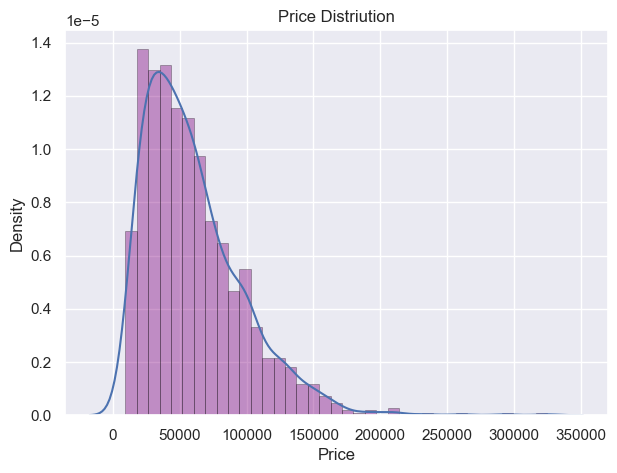

In [105]:
sns.distplot(ld['Price'],
             hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

## Company 

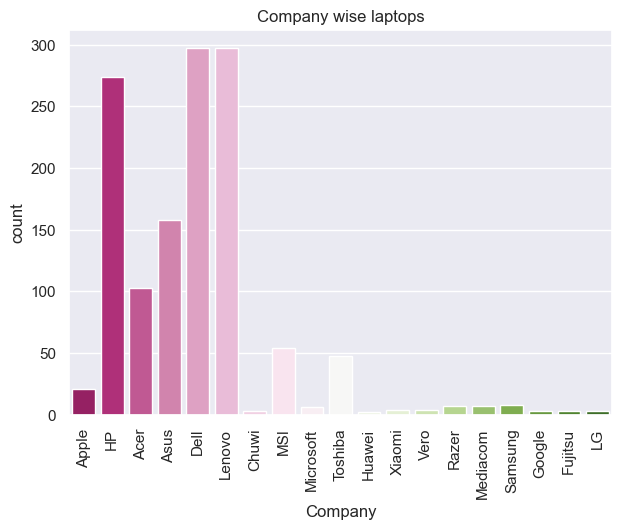

In [106]:
#Company By laptops
sns.countplot(x ='Company', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Company wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

* Most of the laptop brands are Dell, lenovo and Hp.

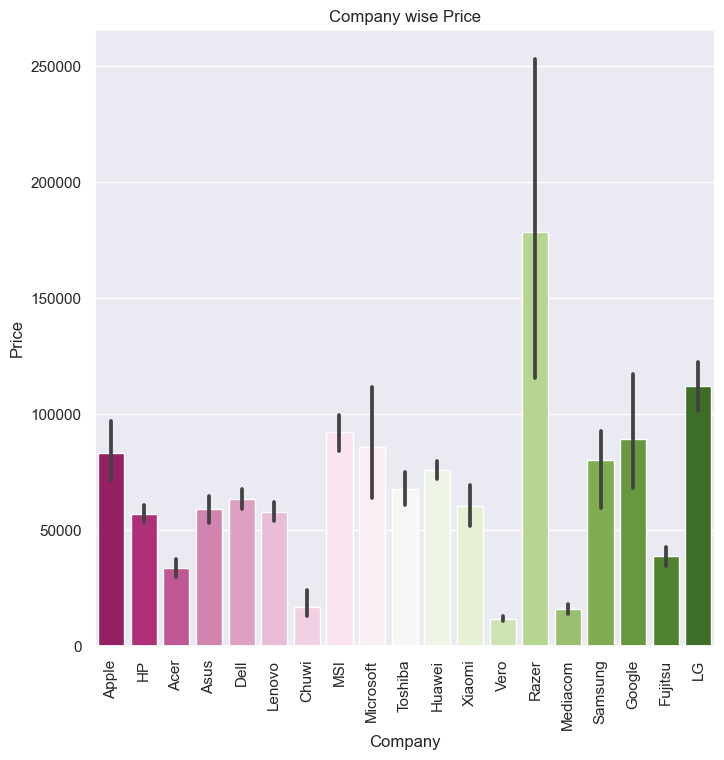

In [107]:
#Company By Price---------------
sns.barplot(x="Company", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("Company wise Price")
plt.show()

* The Razer brands laptops are more expensive than other.

## TypeName 

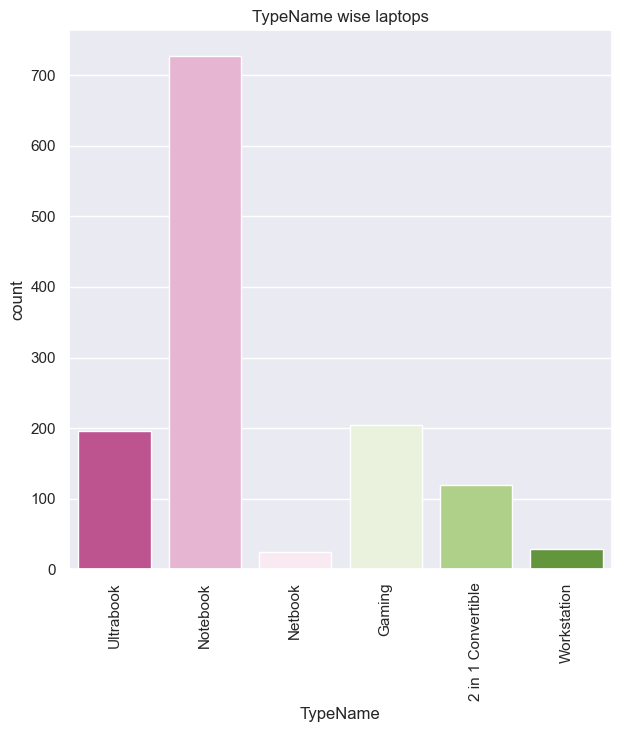

In [108]:
#TypeName By laptops
sns.countplot(x ='TypeName', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

* Laptop type Notebook are the most in the data set

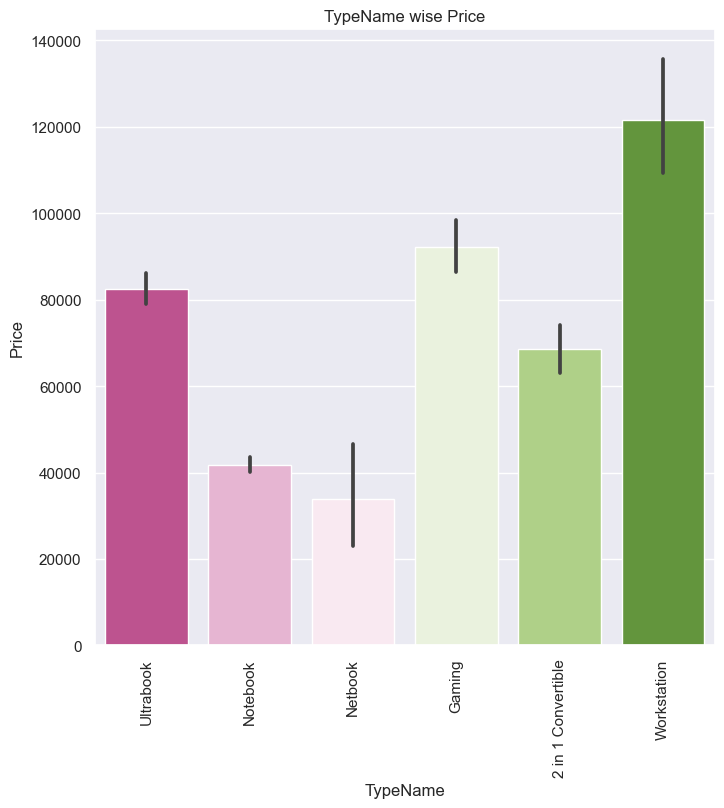

In [109]:
#TypeName By Price
sns.barplot(x="TypeName", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(7, 7)})
plt.title("TypeName wise Price")
plt.show()

* Workstation are the most costly than others.

## Inches 

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


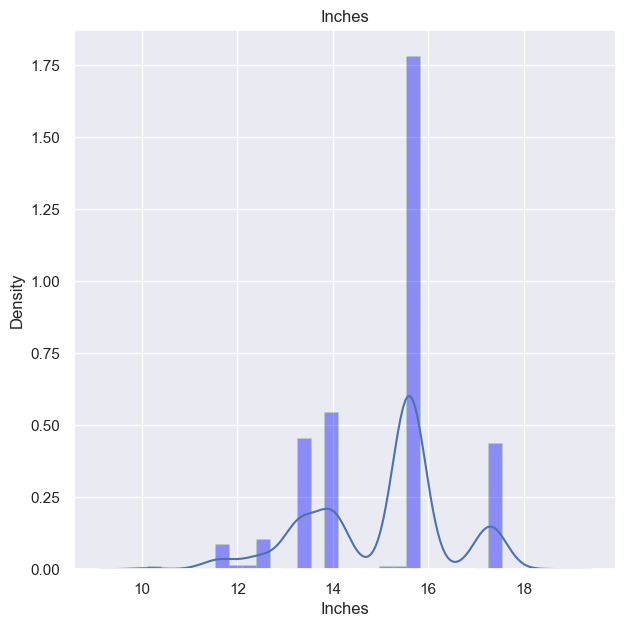

In [111]:
#Distribution plot---------
sns.distplot(df['Inches'],
             hist_kws={'color':'blue', 'edgecolor':'#aaff00',
                       'linewidth':.5, 'linestyle':'--'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Inches")
plt.show()

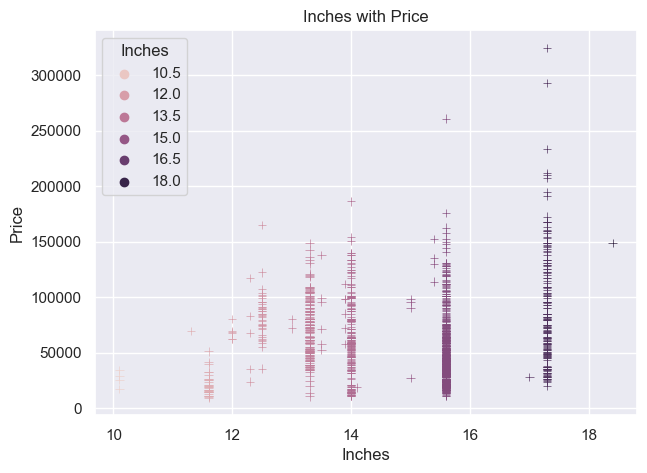

In [112]:
#Scatter plotb
seaborn.scatterplot(x="Inches",
         b           y="Price",
                    hue="Inches",
                    marker = '+',
                    data=df)
plt.title("Inches with Price")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

* we can see that the size really affect the price of a laptop,because higher the size of laptop screeen the higher the price of laptop.

# Feature Engineering

## Screen Resolution

In [114]:
print(df['ScreenResolution'].value_counts())

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [115]:
#Split the column based on Touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [116]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
27,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.200,42624.0000,0,0
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.060,127712.1600,1,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.200,19660.3200,0,0
1106,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.900,80516.2032,0,0
1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.200,61218.7200,0,0
933,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16,1TB SSD,Intel Iris Graphics 540,Windows 10,1.300,95850.7200,1,1
581,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.900,53733.9456,0,0
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.260,71874.7200,0,0
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.0480,1,0
796,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.630,15930.7200,0,0


## TouchScreen Laptop

## TouchScreen Count

TouchScreen Counts:
 0    1111
1     192
Name: Touchscreen, dtype: int64


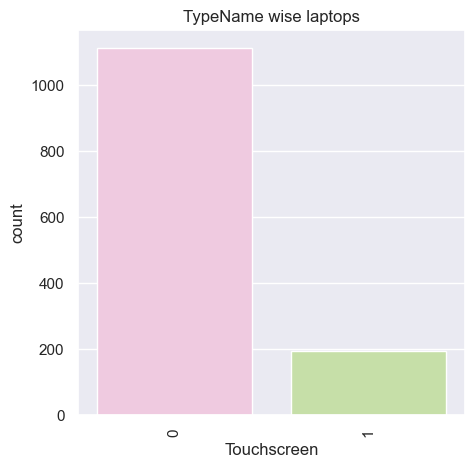

In [123]:
#Touchscreen
print("TouchScreen Counts:\n",df["Touchscreen"].value_counts())
sns.countplot(x ='Touchscreen', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

* Touch Screen Laptop is not much in the dataset

## TouchScreen Vs Price

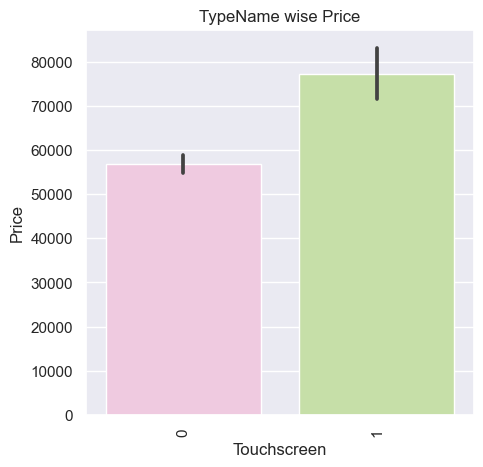

In [124]:
sns.barplot(x="Touchscreen", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("TypeName wise Price")
plt.show()

* Touch Screen Laptop are more expensive

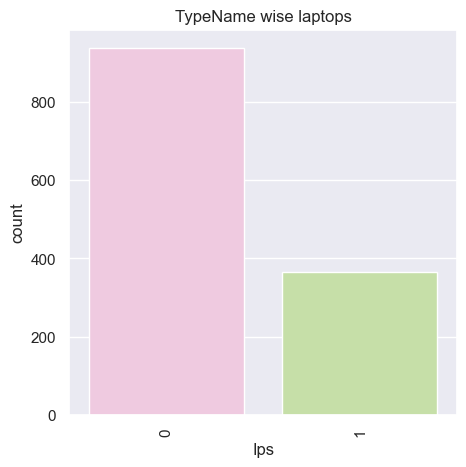

In [125]:
#IPs
sns.countplot(x ='Ips', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("TypeName wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

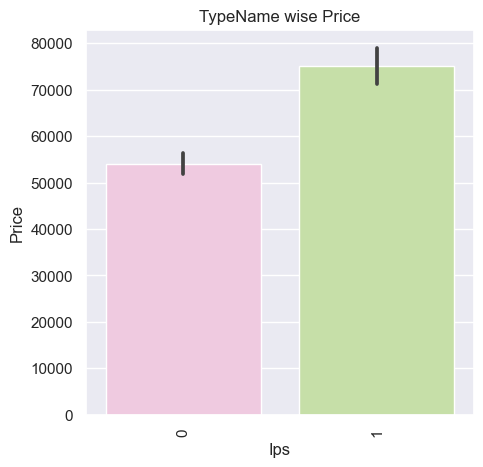

In [126]:
# IPs By Price
sns.barplot(x="Ips", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("TypeName wise Price")
plt.show()

* the price of laptops also depend on ips panel

In [127]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [129]:
# fetching x resolution & y resolution from the screen resolution column
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [130]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
482,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49,38681.28,0,1,IPS Panel Full HD 1920,1080
797,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.95,43156.80,0,0,1366,768
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.60,0,0,Full HD 1920,1080
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.72,0,0,Full HD 1920,1080
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775.52,0,0,Full HD 1920,1080


In [131]:
#Edit X-res
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [132]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1103,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,AMD FirePro W6150M,Windows 7,3.00,154458.72,0,1,1920,1080
24,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.91,35111.52,0,0,1920,1080


In [133]:
#Change data type
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


## Price

In [136]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [137]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [139]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [140]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
14,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8,256GB SSD,Intel HD Graphics 615,macOS,0.92,67260.6720,0,1,2304,1440,226.415547
618,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.94,120831.5808,0,0,1920,1080,141.211998
440,Lenovo,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,27652.3200,0,0,1600,900,106.113062
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.9200,0,1,1920,1080,165.632118
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.9200,0,0,1366,768,100.454670


In [141]:
#drop screenresolution, Inches, X_res and Y_res
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [142]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
872,Toshiba,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,73952.64,0,1,141.211998
970,Dell,2 in 1 Convertible,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Windows 10,1.22,101178.72,1,0,276.053530


## Work with CPU

In [143]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [144]:
#split first 3-words
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [145]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
1043,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.3,55922.688,0,0,141.211998,Intel Core i5
1255,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.0,18061.920,0,0,100.454670,Intel Celeron Dual


In [146]:
#CPU name extration function
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [147]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [148]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
1048,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.6,122010.6672,0,1,127.335675,Intel Core i7,Intel Core i7
738,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.8,111593.8944,0,0,141.211998,Intel Core i7,Intel Core i7


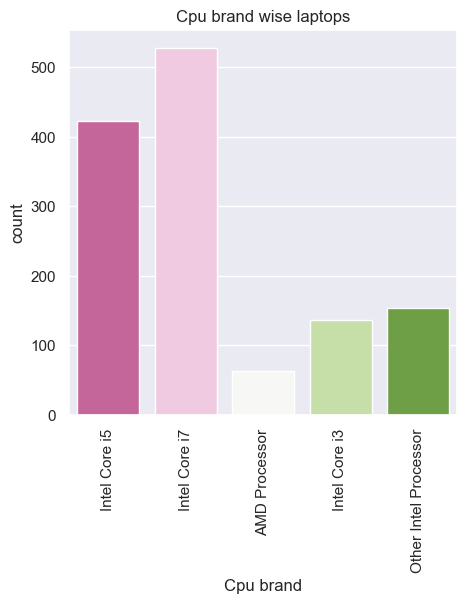

In [150]:
#Cpu brand
sns.countplot(x ='Cpu brand', data = df,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Cpu brand wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

* Cpu brand Intel i7 and i5 are the most in the dataset

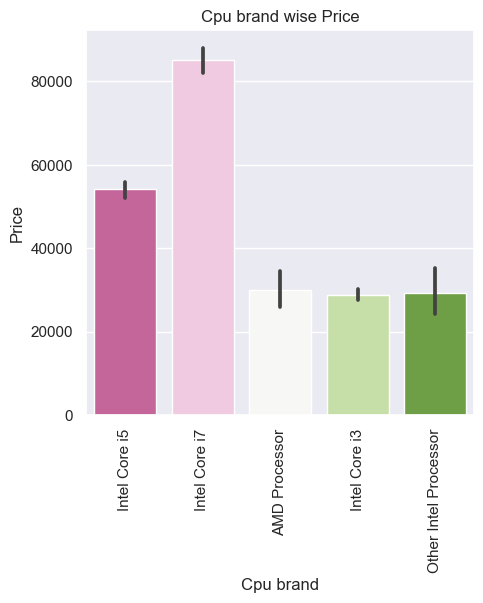

In [151]:
sns.barplot(x="Cpu brand", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Cpu brand wise Price")
plt.show()

* Pocessor Intel i7 are most expensive.

In [152]:
#drop cpu and cpu name 
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [153]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
917,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,85194.72,0,0,127.335675,Intel Core i7
517,Asus,Gaming,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.04,0,0,141.211998,Intel Core i7


## RAM

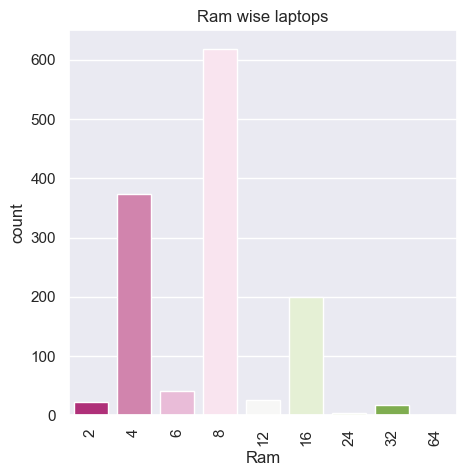

In [154]:
#RAM
sns.countplot(x ='Ram', data = ld,palette ='PiYG')
plt.xticks(rotation='vertical')
plt.title("Ram wise laptops")
sns.set(rc={"figure.figsize":(5, 5)})
plt.show()

* Laptop with 8 GB rams are the most in the dataset.

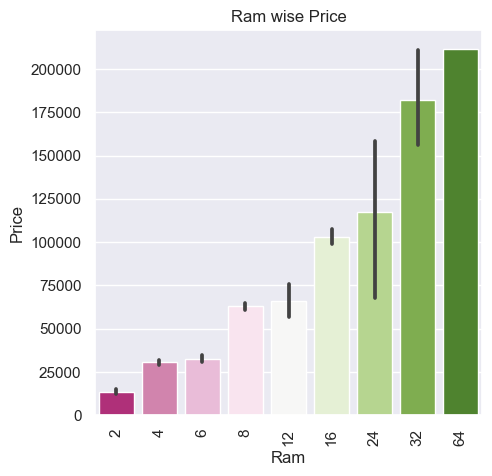

In [155]:
sns.barplot(x="Ram", y="Price", data=ld, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Ram wise Price")
plt.show()

* here we can see that the Size of the RAM also affect the price :)

## Memory

In [156]:
print(df['Memory'].value_counts())

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [157]:
#Split the memory column based on SSD, HDD, TB, Hybrid and Flash storage

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_66777/407917473.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_66777/407917473.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [158]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
634,Asus,Notebook,8,1000 HDD,Intel HD Graphics 500,Windows 10,2.00,21258.72,0,0,100.454670,Other Intel Processor,1000,0,0,0
157,Asus,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,70063.20,1,0,165.632118,Intel Core i5,0,256,0,0
753,Lenovo,Ultrabook,4,180 SSD,Intel HD Graphics 520,Windows 10,1.70,58394.88,0,0,157.350512,Intel Core i5,0,180,0,0
313,Acer,Notebook,8,256 SSD,AMD Radeon R5,Windows 10,2.23,24988.32,0,0,141.211998,AMD Processor,0,256,0,0
1115,Dell,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.12,0,0,165.632118,Intel Core i7,0,256,0,0


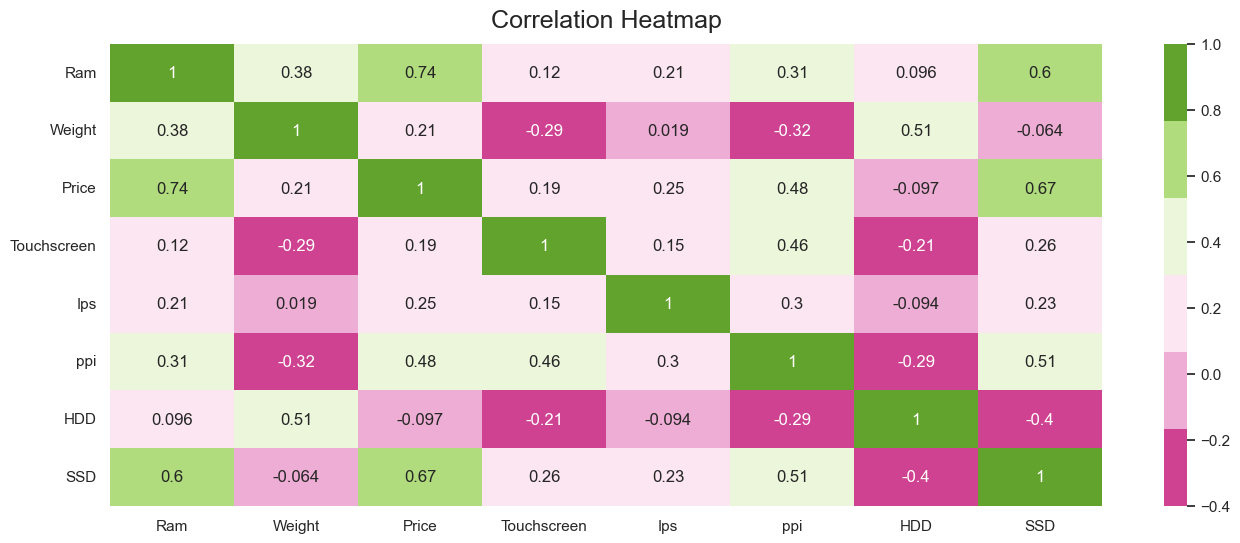

In [159]:
plt.figure(figsize=(16, 6))
colormap = sns.color_palette("PiYG")
sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

In [160]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [161]:
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
1064,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,1.8,102777.12,0,0,141.211998,Intel Core i7,1000,256
54,Acer,Notebook,4,Intel HD Graphics 620,Windows 10,2.4,20459.52,0,0,100.454670,Intel Core i3,1000,0


## GPU

In [162]:
print(df['Gpu'].value_counts())

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64


In [163]:
#split first 3-words
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [164]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [165]:
#drop GPU 
df.drop(columns=['Gpu'],inplace=True)

In [166]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [167]:
#drop ARM GPU
df = df[df['Gpu Brand'] != 'ARM']

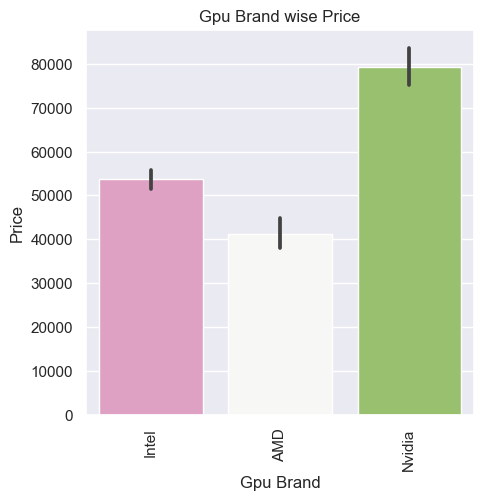

In [168]:
sns.barplot(x="Gpu Brand", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("Gpu Brand wise Price")
plt.show()

## Operating System

In [169]:
print(df['OpSys'].value_counts())

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64


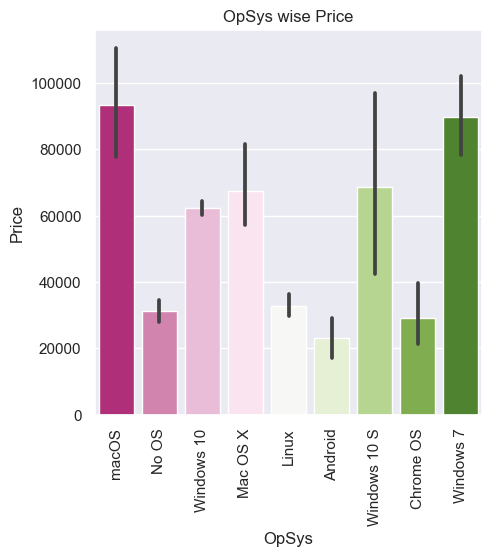

In [170]:
sns.barplot(x="OpSys", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

In [171]:
#OPs extrating function

def category_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [174]:
df['os'] = df['OpSys'].apply(category_os)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_66777/3834171172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(category_os)


In [175]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


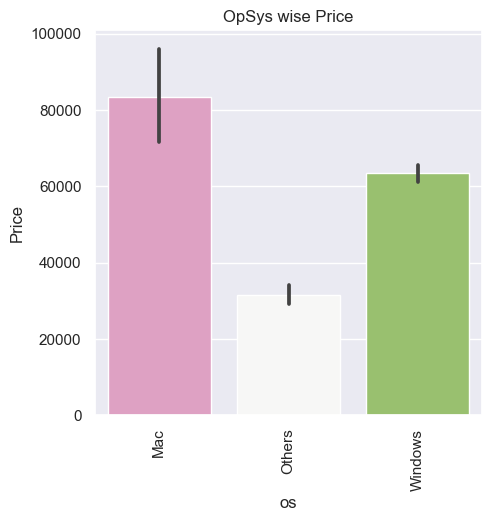

In [176]:
sns.barplot(x="os", y="Price", data=df, palette="PiYG")
plt.xticks(rotation='vertical')
sns.set(rc={"figure.figsize":(5, 5)})
plt.title("OpSys wise Price")
plt.show()

In [177]:
df.drop(columns=['OpSys'],inplace=True)

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_66777/3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [178]:
df.sample(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
495,Lenovo,Ultrabook,8,1.30,58554.72,0,1,125.367428,Intel Core i5,0,180,Intel,Windows
41,Dell,Gaming,16,2.65,79866.72,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows


## Weight

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


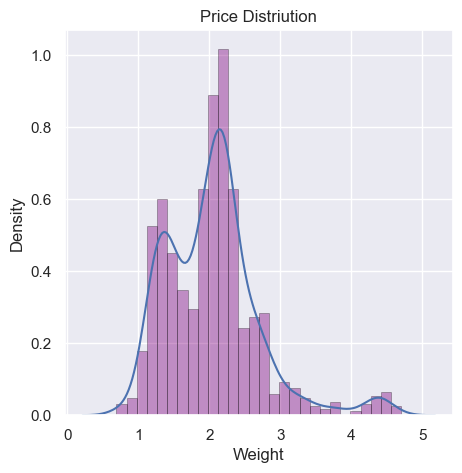

In [179]:
#Distplot
sns.distplot(ld['Weight'],
             hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

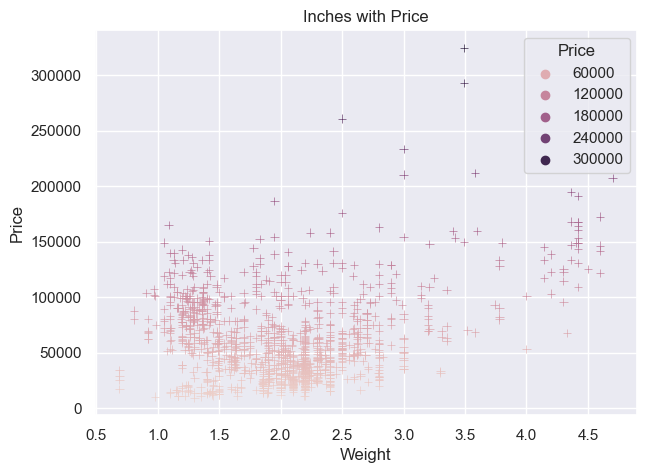

In [180]:
#Scatterplot------------
seaborn.scatterplot(x="Weight",
                    y="Price",
                    hue="Price",
                    marker = '+',
                    data=ld)
plt.title("Inches with Price")
sns.set(rc={"figure.figsize":(8, 8)})
plt.show()

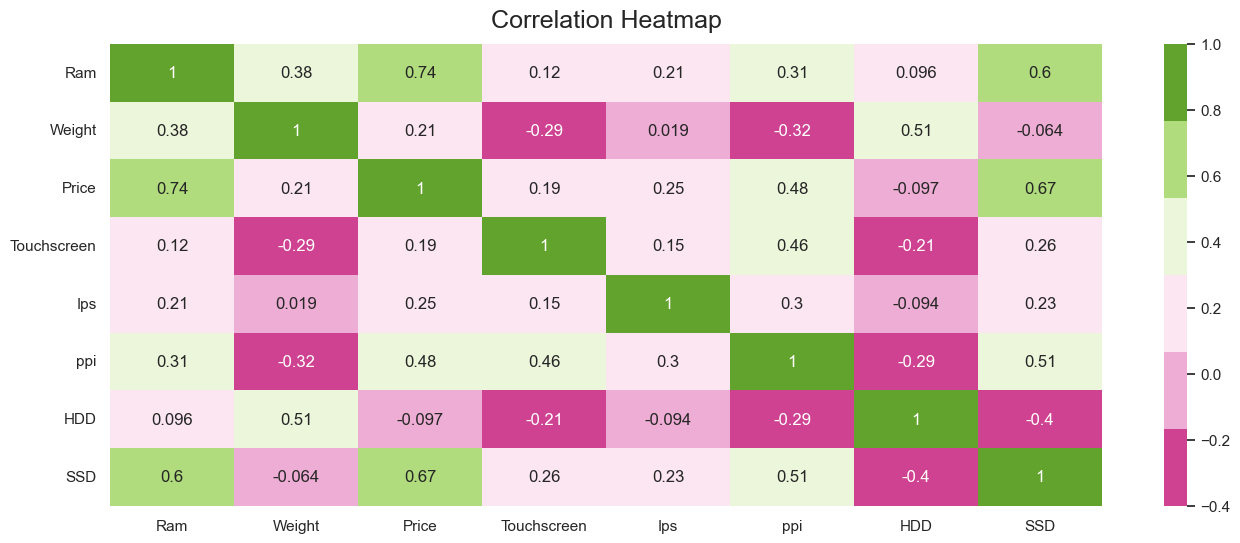

In [181]:
#Let's see corr on weight

plt.figure(figsize=(16, 6))
colormap = sns.color_palette("PiYG")
sns.heatmap(ld.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

## price

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


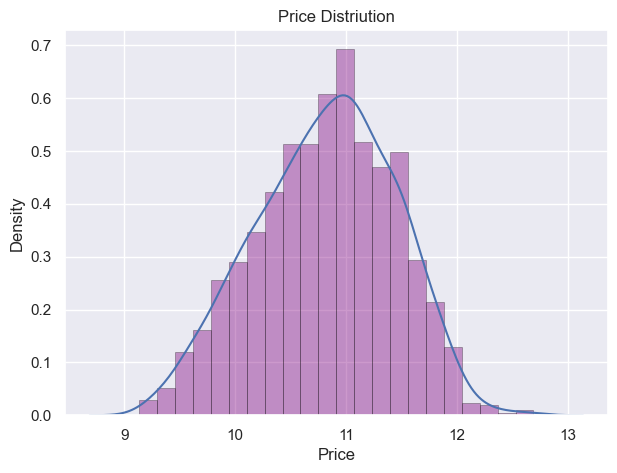

In [183]:
#Apply Log in price function
sns.distplot(np.log(df['Price']),hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution") #It's normal distribution
plt.show()

# Model Building

In [184]:
#Divide the data for x and y
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [185]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [186]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Train_Test Split

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [188]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others


In [196]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,500,0,AMD,Others
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,0,256,Intel,Windows


In [190]:
!pip install xgboost

In [191]:
#Import all ML algoritham 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [197]:
#creating dictionary for storing different models accuracy
model_comparison={}

# Linear Regression

In [198]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 80.73%
MAE : 21.02%
MSE : 7.37%
Cross Val Accuracy: 81.79 %


## RandomForest Regression

In [199]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.10,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['RandomForest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 89.49%
MAE : 15.55%
MSE : 4.02%
Cross Val Accuracy: 85.91 %


# Model Comparison

In [200]:
Model_com_ld=pd.DataFrame(model_comparison).T
Model_com_ld.columns=['R2 Score','MAE','MSE','Cross Val Accuracy']
Model_com_ld=Model_com_ld.sort_values(by='R2 Score',ascending=False)

In [201]:
Model = Model_com_ld.style.format("{:.2%}").background_gradient(cmap='RdPu')

In [202]:
Max = Model_com_ld.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

In [203]:
Min = Model_com_ld.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

In [204]:
Model

,R2 Score,MAE,MSE,Cross Val Accuracy
RandomForest Regression,89.49%,4.02%,15.55%,85.91%
Linear Regression,80.73%,7.37%,21.02%,81.79%


In [205]:
Min

,R2 Score,MAE,MSE,Cross Val Accuracy
RandomForest Regression,89.49%,4.02%,15.55%,85.91%
Linear Regression,80.73%,7.37%,21.02%,81.79%


In [206]:
Max

,R2 Score,MAE,MSE,Cross Val Accuracy
RandomForest Regression,89.49%,4.02%,15.55%,85.91%
Linear Regression,80.73%,7.37%,21.02%,81.79%


In [207]:
Model

,R2 Score,MAE,MSE,Cross Val Accuracy
RandomForest Regression,89.49%,4.02%,15.55%,85.91%
Linear Regression,80.73%,7.37%,21.02%,81.79%
